## Problem Setup
Our goal is to compare methods for computing expectations of the form
$$
\mathbb{E}\left[ h(\theta) \right] = \int_\Omega h(\theta) p(\theta) d\theta.
$$
In this example, we will assume that
- The model is exponential $h(\theta) = \exp(\theta)$.
- The scalar random variable $\theta$ is standard Normal, i.e. $\theta \sim N(0, 1)$

In [1]:
import pymuqModeling as mm
import pymuqUtilities as mu
import pymuqApproximation as ma

import numpy as np
import matplotlib.pyplot as plt

## Analytic
When $\theta$ is a Gaussian random variable, the distribution of $\exp(\theta)$ is lognormal, which has a known mean and variance.  In particular, 
$$
\mathbb{E}\left[ \exp(\theta) \right] = \exp\left[ \mu_\theta + \frac{\sigma_\theta^2}{2}\right]
$$

In [2]:
aMean = np.exp(0.5)

print('Analytic mean = %2.4f'%aMean)

Analytic mean = 1.6487


## Gauss Quadrature

MUQ constructs Gauss-Quadrature rules from families of orthogonal polynomials.  To construct a quadrature rule for a Gaussian input, we then need to use the probabilist Hermite family of polynomials, which is orthogonal wrt a standard normal measure.

The Probabilist Hermite quadrature rule uses a weight of $\exp\left(-\frac{1}{2}\theta^2\right)$, which needs to be scaled by $(2\pi)^{-1/2}$ to integrate using with a weight given by a Gaussian PDF.

In [12]:
quadOrder = 3

poly = ma.ProbabilistHermite()
quadRule = ma.GaussQuadrature(poly, quadOrder)

quadPts = quadRule.Points()
quadWts = quadRule.Weights()

qMean = np.sum( quadWts*(np.exp(quadPts))) / np.sqrt(2.0*np.pi)

print('Gauss Quadrature Evaluations = %d'%len(quadPts))
print('Gauss Quadrature Mean = %2.4f'%qMean)

Gauss Quadrature Evaluations = 3
Gauss Quadrature Mean = 1.6382


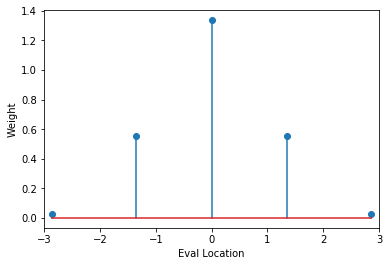

In [4]:
plt.stem(quadPts,quadWts)
plt.xlim([-3,3])
plt.xlabel('Eval Location')
plt.ylabel('Weight')
plt.show()

## Monte Carlo

In [13]:
numPts = 200
samps = mu.RandomGenerator.GetNormal(numPts)
weights = (1.0/numPts)*np.ones(numPts)

mcMean = np.mean( np.exp(samps) )

print('Monte Carlo Evaluations = %d'%numPts)
print('Monte Carlo Mean = %2.4f'%mcMean)

Monte Carlo Evaluations = 200
Monte Carlo Mean = 1.4885


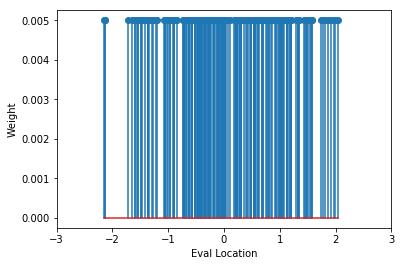

In [6]:
plt.stem(samps,weights)
plt.xlim([-3,3])
plt.xlabel('Eval Location')
plt.ylabel('Weight')
plt.show()

## Next steps:
Can you adapt the code to compute $\mathbb{E}[\exp(\theta)]$ for a uniformly distributed input, i.e. $\theta\sim U[0,1]$?